<h1 align="center">Volume 4: Inverse Problems.</h1>

    Spencer Halverson
    MATH 439
    2022-01-27

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.optimize import minimize

# Problem 1

Solve (16.2) for a(x).
Produce the plot shown in Figure 16.2.

In [9]:
# set constants
c0 = 3/8
c1 = 5/4
u = np.vectorize(lambda x: x**2 + x/2 + 5/16)
du = np.vectorize(lambda x: 2*x + 0.5)
f = np.vectorize(lambda x: -6*x**2 + 3*x - 1 if x <= 0.5 else -1)


N = 10
h = 1./N
x_vals = np.linspace(0, 1, N+1)

# # define phi function

# def phi(i, x):
#         if i == 0:
#             if x>x_vals[1]:
#                 return 0
#             else:
#                 return (x_vals[1] - x)/h[0]
#         if i == N:
#             if x < x_vals[-2]:
#                 return 0
#             else:
#                 return (x - x_vals[-2])/h[-1]
#         if x >= x_vals[i-1] and x <= x_vals[i]:
#             return (x-x_vals[i-1])/h[i-1]
#         elif x>= x_vals[i] and x <= x_vals[i+1]:
#             return (x_vals[i+1]-x)/h[i]
#         else:
#             return 0

# set a function to minimize (for alpha values)

def G(alpha, c0, xj, f):
    return ((c0 - quad(f, 0, xj)[0])/alpha - du(xj))**2



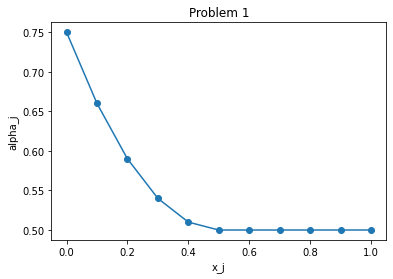

In [13]:
# solve for alpha
alpha = []
for xj in x_vals:
    res = minimize(G, x0=np.array([1]), args=(c0, xj, f))

    alpha.append(res.x)

# plot
plt.xlabel("x_j")
plt.ylabel("alpha_j")
plt.plot(x_vals, alpha, 'o-')
plt.title("Problem 1")
plt.show()

# Problem 2

Find the density function a(x). Using several values of ε > 0.66049142, plot the corresponding
density a(x) for x in np.linspace(0,1,11) to demonstrate that the problem is ill-posed.

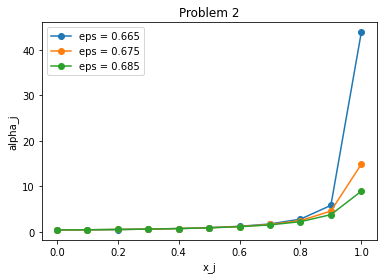

In [17]:
f = np.vectorize(lambda x: -1)
c0 = 1
c1 = 2

x_vals = np.linspace(0,1,11)
for eps in [0.665, 0.675, 0.685]:
    u = np.vectorize(lambda x: x+1+ eps*np.sin(eps**(-2) * x))
    du = np.vectorize(lambda x: 1 + eps**(-1)*np.cos(eps**(-2)*x))

    # solve for alpha
    alpha = []
    for xj in x_vals:
        res = minimize(G, x0=np.array([1]), args=(c0, xj, f))

        alpha.append(res.x)

    # plot
    plt.plot(x_vals, alpha, 'o-', label="eps = {}".format(eps))

plt.xlabel("x_j")
plt.ylabel("alpha_j")
plt.title("Problem 2")
plt.legend(loc='best')
plt.show()

As you can see, these epsilon differ by only 0.01 each, but the resulting solutions differ by 10-30. The problem is ill-posed since it doesn't depend continuously on the initial conditions.